Copyright 2020 Vasile Rus, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Decision Trees

So far we have talked about the KNN classifier, which uses *closeness to known points* to classify, and logistic regression, which uses *probability* to classify.
Decision trees are a new idea that uses a *tree* to classify.

Building a decision tree means, as the name implies, generating a tree in which each internal node of the tree is a decision point, usually deciding which of that node's children to consider next based on the values of the predictor or feature associated with the current node.

 The goal is to reach a leaf node which corresponds to a prediction, for instance, the category of the object/instance described by the predictors/features.
 
## What you will learn

In this notebook, you will learn about decision trees, an original data
science paradigm to approach primarily classification tasks, and how it can
be used to infer from labeled/annotated data decision tree based
classifiers.  We will study the following:

- The basics of decision trees
- Details about how decision trees are built
- Criteria to evaluate features/predictors
- Interpreting paths from the root to leaf nodes
- Visualization of decision trees
- Evaluation of performance for decision trees


## When to use decision trees

Decision trees are useful when you have a categorical response/outcome
variable and there are multiple features/predictors that can be used to
predict the correct value of the outcome variable. The ultimate goal is to
build automatically a decision tree to predict the
correct value of the outcome variable for a new instance described by the
set of predictors/features. It can also be used as a feature selection tool
to determine which features/predictors are most discriminatory with respect
to the outcome variable. Decision trees have the major of being
interpretable over many other classification paradigms.

## Example

 An example of such a tree is given below, just for illustration purposes.
 It uses two decision nodes (the circles/blue nodes): `Rainy`, which has two values Yes and No, and `Fit`, which has two values as well: Yes - meaning being fit to play - and No - not being fit to play for whatever reason, medical or not.
 The leaf nodes at the bottom correspond to the outcomes: Play or No-Play.
 
 Using this tree, if it is NOT `Rainy` and `Fit` is Yes, the decision in the corresponding leaf node is Play.
 That is, a path from the root/top node to a leaf node illustrates a decision path resulting in the decision shown in the leaf node.
 Each path in decision trees can be expressed as an IF-THEN, for instance: IF (Rainy == No) AND (Fit == Yes) THEN Play.
 
 While this example uses nominal variables that are binary (yes/no), the same approach also works for other variable types.
 For example, ratio variables can be given a decision threshold such that one path is followed if the value is above that threshold vs. below.
 Continuing the example below, if we replaced `Rainy` with `Cloud cover`, then we could set a threshold of 50%, so that if `Cloud cover` was above 50%, then we would follow the arrow to No-Play and otherwise we'd follow the arrow to `Fit`.

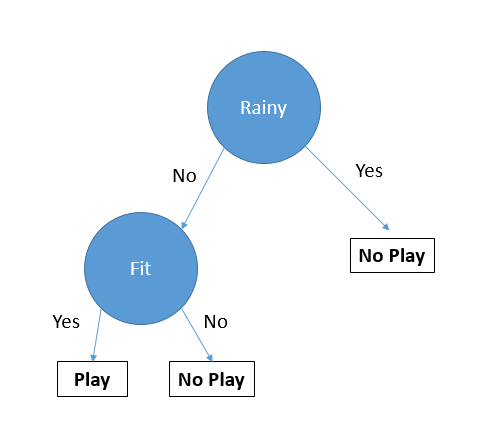

It's one thing to create a tree by hand - the magic is learning a tree like this from the data.

As a simple example, we consider the artificially created dataset below:

| Rainy | Fit | Play |
|------------|------------|-------------|
| 0          | 0          | 0           |
| 0          | 1          | 1           |
| 1          | 1          | 0           |
| 1          | 0          | 0           |

<!-- NOTE: trying to simplify
In this dataset, there are four instances. Each instances has two predictors, say $predictor_1$ and $predictor_2$, which are the first values in each instance. $Predictor_1$ could indicate whether it is rainy (1) or not (0) whereas $predictor_2$ may indicate whether a person feels fit (1) to play, say, tennis or not (0). The last value in each instance is the class: 0 (no play) or 1 (play).
The Python code below illustrates how to build a decision tree based on this simple data. -->
Let's build a decision tree using this simple data:
- Create variable `X` and set it to a list containing
    - a list containing
        - 0
        - 0
    - a list containing
        - 0
        - 1
    - a list containing
        - 1
        - 1
    - a list containing
        - 1
        - 0
- Create a variable `Y` and set it to a list containing
    - 0
    - 1
    - 0
    - 0
    
As you can see, we've recreated the table above using these lists.
Normally we work with larger dataframes, so you may not have thought of it this way, but ultimately all our data is just lists of numbers like this.

In [1]:
X = [[0, 0], [0, 1], [1, 1], [1, 0]]
Y = [0, 1, 0, 0]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="Iwb#y?nx(@|hrx`dPD21" x="225" y="122"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="lists_create_with" id="M(r*hCGi-1+FP3$9I/jI"><mutation items="4"></mutation><value name="ADD0"><block type="lists_create_with" id="!mtX-`LPTj2ek-kix54P"><mutation items="2"></mutation><value name="ADD0"><block type="math_number" id="w@E:*IEeZ_vb.xt/W.1`"><field name="NUM">0</field></block></value><value name="ADD1"><block type="math_number" id="m1Q];BPvl{pmtXT^T9*u"><field name="NUM">0</field></block></value></block></value><value name="ADD1"><block type="lists_create_with" id="/G|.+K|h9-p~!!LHIkw}"><mutation items="2"></mutation><value name="ADD0"><block type="math_number" id="Q=zSR?(Ysp[S{hh_0}t@"><field name="NUM">0</field></block></value><value name="ADD1"><block type="math_number" id="KT4OlB?BCwAy~6VyG0oh"><field name="NUM">1</field></block></value></block></value><value name="ADD2"><block type="lists_create_with" id="^_N6We|_:gx(xQiFu]aW"><mutation items="2"></mutation><value name="ADD0"><block type="math_number" id="O+U8]nd%wt}c-:C#Ho1D"><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id=":*9[$?!#gwbPt69dmLo|"><field name="NUM">1</field></block></value></block></value><value name="ADD3"><block type="lists_create_with" id="edXG56R~rZt/}bb9.FNe"><mutation items="2"></mutation><value name="ADD0"><block type="math_number" id="#2(OH@:RIQG-221lz|Nc"><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id="tgFCw4(dD*iA^?h`{xP-"><field name="NUM">0</field></block></value></block></value></block></value><next><block type="variables_set" id="Hb9H-%nIxKc,UMwINy57"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="lists_create_with" id="qk~BgitfP@aj/2oa+`W("><mutation items="4"></mutation><value name="ADD0"><block type="math_number" id="IV{G{Q+%sJS#Nv)XO4;I"><field name="NUM">0</field></block></value><value name="ADD1"><block type="math_number" id="DinOCv.!$Vk[!{j5WaW;"><field name="NUM">1</field></block></value><value name="ADD2"><block type="math_number" id="DEjz[VWhV:(ZleV{V(Y1"><field name="NUM">0</field></block></value><value name="ADD3"><block type="math_number" id="2EzEW`TvJ(5/i@?`.Kh;"><field name="NUM">0</field></block></value></block></value></block></next></block></xml>

Next the imports for creating the decision tree model and graphing it:

- `import sklearn.tree as tree`
- `import graphviz as graphviz`

In [2]:
import sklearn.tree as tree
import graphviz as graphviz

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable></variables><block type="importAs_Python" id="g[,/=2yYgO?4Bv[OrVf;" x="16" y="10"><field name="libraryName">sklearn.tree</field><field name="libraryAlias" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><next><block type="importAs_Python" id="5j3UPoKQcO/bU0u!@P06"><field name="libraryName">graphviz</field><field name="libraryAlias" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field></block></next></block></xml>

Create the model:

- Create `decisionTreeExample`
- Set it to `with tree create DecisionTreeClassifier using`

In [3]:
decisionTreeExample = tree.DecisionTreeClassifier()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@[.K6R7D##dBf3mu(%2`">decisionTreeExample</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="variables_set" id="}:yCB*e+[r5M{rIc($M]" x="84" y="299"><field name="VAR" id="@[.K6R7D##dBf3mu(%2`">decisionTreeExample</field><value name="VALUE"><block type="varCreateObject_Python" id="bcO!l)K~/m6oq}xWIulv"><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">DecisionTreeClassifier</field><data>tree:DecisionTreeClassifier</data></block></value></block></xml>

And fit the model

- `with decisionTreeExample do fit using` a list containing
    - `X`
    - `Y`

In [4]:
decisionTreeExample.fit(X, Y)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@[.K6R7D##dBf3mu(%2`">decisionTreeExample</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="varDoMethod_Python" id=",S.=/_X:;`m5Ahy=!xmE" x="40" y="235"><field name="VAR" id="@[.K6R7D##dBf3mu(%2`">decisionTreeExample</field><field name="MEMBER">fit</field><data>decisionTreeExample:fit</data><value name="INPUT"><block type="lists_create_with" id="}F0@!:1xqW/}(Dj%-V78"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="2:V:wGJK%j=I8yZEc^o}"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="BG#`Opts05WCR={8qe{k"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value></block></value></block></xml>

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let's visualize the tree and interpret how the algorithm fit the tree to the data.
This is a little complicated to set up, but the results are worth it:

- Create `dot_data` and set to `with tree do export_graphviz using` a list containing
    - `decisionTreeExample`
    - freestyle `out_file=None`
    - freestyle `feature_names=['Rainy','Fit']`
    - freestyle `class_names=['NoPlay','Play']`
    - freestyle `filled=True`
    - freestyle `rounded=True`
    - freestyle `special_characters=True`
    
- `with graphviz create Source using` a list containing `dot_data`

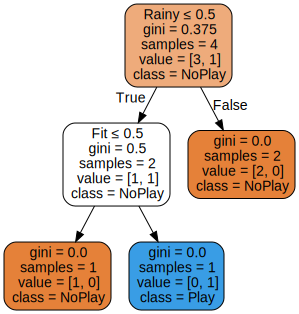

In [5]:
dot_data = tree.export_graphviz(decisionTreeExample, out_file=None, feature_names=['Rainy','Fit'], class_names=['NoPlay','Play'], filled=True, rounded=True, special_characters=True)

graphviz.Source(dot_data)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F.ej=Hud7vT9uozVaF5C">dot_data</variable><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="@[.K6R7D##dBf3mu(%2`">decisionTreeExample</variable></variables><block type="variables_set" id=":6*zm74#9$!O3?QVUukE" x="209" y="280"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field><value name="VALUE"><block type="varDoMethod_Python" id="jsRyzb,9t~G^G@G@SMkS"><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">export_graphviz</field><data>dot_data:</data><value name="INPUT"><block type="lists_create_with" id="r2_rY*ef1v:96w)e_B6K"><mutation items="7"></mutation><value name="ADD0"><block type="variables_get" id="x$]b$%X#}qjO@0H/!O|N"><field name="VAR" id="@[.K6R7D##dBf3mu(%2`">decisionTreeExample</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="K!=:ty3DMPs#b^ziH=5p"><field name="CODE">out_file=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="by]EM[Y$kMG~MfF0{q^,"><field name="CODE">feature_names=['Rainy','Fit']</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_Python" id="2hz~E.{8:W9-wWb*9Ut~"><field name="CODE">class_names=['NoPlay','Play']</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock_Python" id="^IJ3b3Eg7K9k^6Of_4i%"><field name="CODE">filled=True</field></block></value><value name="ADD5"><block type="dummyOutputCodeBlock_Python" id="VH!NxdBRgItjnN]Zs^Uh"><field name="CODE">rounded=True</field></block></value><value name="ADD6"><block type="dummyOutputCodeBlock_Python" id="f*|7fCy,K/0{_WzfribG"><field name="CODE">special_characters=True</field></block></value></block></value></block></value></block><block type="varCreateObject_Python" id="-a(nDg:Sgtf)Ey5vB4(x" x="187" y="513"><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field><field name="MEMBER">Source</field><data>graphviz:Source</data><value name="INPUT"><block type="variables_get" id="!M}@xBlLyRkl~Us)Smh%"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field></block></value></block></xml>

Let's pause for a moment and look at the tree.
The first node *splits* on whether `Rainy` is &le; 0.05 (i.e is 0 or 1).
If it isn't (i.e. is 1), then we go to the right and `NoPlay`.
If it is, we go to the left and test whether `Fit` is &le; 0.05 (i.e is 0 or 1).
If it isn't (i.e. is 1), we go to the right and `Play`.
If it is, we go to the left and `NoPlay`.

Underneath the split rule for each node are several properties with an = :

- `samples=` describes how many datapoints fall under that node. So at the top, we have 4 because all samples fall under that node. When we get to the bottom nodes, or **leaves** (which are all fully shaded), `samples` shows how many datapoints fell into each leaf, and those numbers *sum* to 4.
- `value=` describes how many of each class (`NoPlay`, `Play`) fall under that node. Notice the leaf nodes only contain one class or the other - this is important as we'll discuss later.
- `class=` is the class that will be returned for datapoints in the node, but it only has meaning for the leaves.

## Theoretical Background

Building a decision tree means deciding which predictor/feature should correspond to which node of the tree and which predictions should correspond to which terminal nodes or leaf nodes of the tree.
 The predictions in the leaf nodes in our case are class label.
 Decision trees are commonly used for classification.
 The tree is constructed so that predictors that better split the instances according to some criterion such as information gain (IG; to be discussed shortly) are placed higher in the decision tree.
 The net effect of such a strategy is to minimize the depth of the tree, i.e., to make the tree as flat as possible.

The general algorithm to infer a particular Decision Tree (i.e., a particular configuration of internal and leaf nodes arranged in a tree) for a given dataset is the following:

1. Select the best predictor based on some criterion such as Information Gain (discussed shortly)
2. Split the data set into subsets based on the values of the chosen predictor in Step 1.
3. Repeat the above process for the subsets until one of the following conditions is met:
 - all the instances in the subset belong to the same class.
 - there are no more predictors/features left.
 - no more instances.

The most widely used predictor selection criteria are:
 - Entropy
 - Information Gain
 - Gain Ratio
 - Gini Index
 - Chi-square
 - Reduction in Variance

### Entropy and Information Gain

One of the most widely used criteria to guide the construction of Decision Trees is $Information Gain (IG)$ which relies on another fundamental concept called $Entropy (E)$.
We will define first entropy E and then IG.

*Entropy*

Entropy is a measure of uncertainty or impurity of a set of items.
 It can also be regarded as a measure of the diversity of a set of items.
 For instance, in the left urn (Urn A) below there are only red balls.
 The impurity of this set of balls is 0 - the purity is perfect as all the balls are of the same color (red) or we can say they all belong to class 'red'.
 The urn on the right (Urn B) has two types of balls - red and blue - and therefore is less pure or more diverse.
 When drawing balls from Urn A we are certain that the ball is red.
 When we draw balls from urn B we are less certain whether the ball will be red as we may also draw a blue ball.


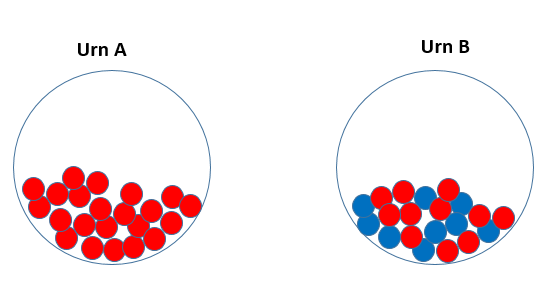

In order to measure this degree of uncertainty, the following formula has been proposed which accounts for the distribution of the possible values/labels/classes/categories C in a set of items S:

$$ E (S) =  \sum \limits _{j=1} ^{C} P(c_j)log_2 P(c_j) $$

In general, the more balanced the distribution of categories in a set of items the higher the entropy. You can see the entropy for a set of items with two categories. 

<!-- NOTE: on this image, the y-axis is H(X); should we make E(S) to match the equations? -->
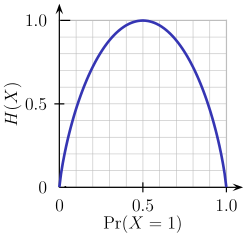

As you can see, the entropy is maximum when the two categories have an equal probability 50-50, e.g., 50% chance of drawing a red ball versus 50% chance of drawing a blue ball.
For instance, a set of 30 red balls and 30 blue balls is perfectly balanced and therefore has maximum entropy as opposed to a set with 50 red balls and 10 blue balls in which case the chances/probability of drawing a red balls are much higher.

When we have a set S of items (X,Y) where Y describes possible outcomes and X are the predictors/features/attributes then we can compute the entropy of a partition of S according to the values $v$ of a particular predictor $x$ as in the following:

$$ E (S, x) =  \sum \limits _{v \in x} P(x=v) E(S_v) $$

where $x$ is a predictor from the set of predictors $X$ and $E(S,x)$ is the entropy of the split of the set S into subsets ${S_v}$ according to the values of $x$.
As it can be seen, the entropy $E(S,x)$ of such as split is computed as the weighted average of the entropies of each of the subsets $S_v$ corresponding to each of the values $v$ of predictor $x$.
The weight corresponds to the probability of that value $P(x=v)$ and is computed as $\frac {|S_v|} {|S|}$. 

*Information Gain*

Information Gain is a selection criterion for predictors and measures how well a predictor can separate the dataset with respect to outcome categories Y.
Predictors that separate the dataset into more pure subsets are preferred as they are more informative, i.e., they will lead to more flat (less deep), simpler trees which should generalize better to new instances.
Intuitively, you can see in the image below two splits of a set S according to one predictor ($P_i$, bottom left split in the figure) or another ($P_j$, bottom right split).

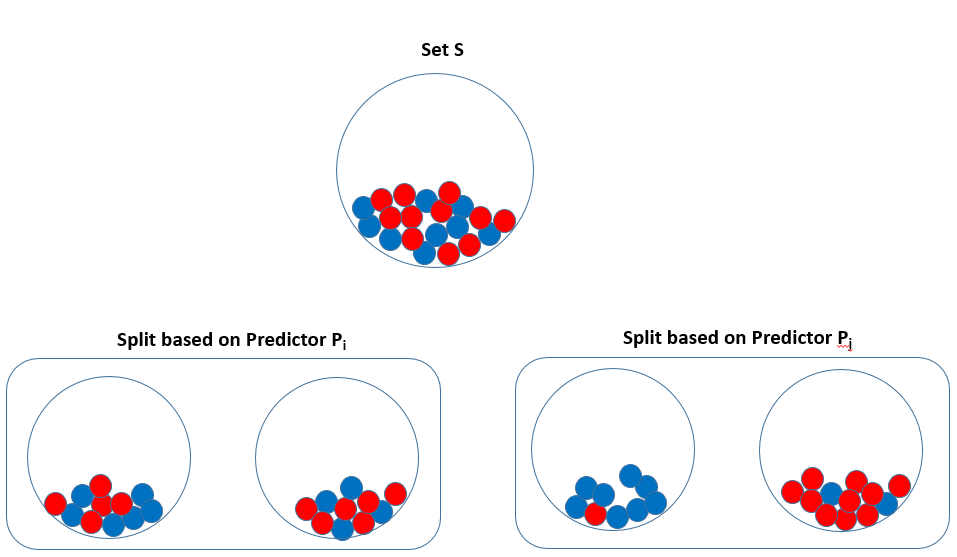

The partition on the right is better as it leads to purer subsets, i.e., the resulting subsets have more balls of the same color.

Information Gain for a predictor $x$ and items set S is defined as:

$$ IG (S,x) = E(S) - E(S,x) $$

which can be expanded based on the previous formulas as follows:

$$ IG (S,x) = E(S) - E(S,x) = \sum \limits _{j=1} ^{C} P(c_j)log_2 P(c_j) - \sum \limits _{v \in x} P(x=v) E(S_v) = \sum \limits _{j=1} ^{C} P(c_j)log_2 P(c_j) - \sum \limits _{v \in x} \frac {|S_v|} {|S|} E(S_v) $$

From the definition, IG can be viewed as a measure quantifying the reduction in entropy of the original dataset versus the entropy of the subsets resulting from splitting the original dataset into subsets based on the values of the predictor $x$.

*ID3 Algorithm*

The ID3  (Iterative Dichotomizer) algorithm selects a decision tree using a top-down greedy search strategy through the space of possible decision trees, i.e., the set or space of all possible trees that can be arranged by assigning the predictors to nodes in all possible combinations.
The greedy strategy in ID3 can be summarized as below:

- Give the set of unselected predictors, select the predictor with the highest Information Gain (IG)
- Divide the dataset, i.e., the set of instances, into subsets based on the values of the selected attribute
- Repeat the above process for each of the subsets until the subset is empty or the subset is homogeneous (contains instances belonging to on class), or no more predictors are available.

We will illustrate the ID3 algorithm on the Iris data set next.

## Iris Example

We will now exemplify how to build a decision tree for the Iris dataset. 
The goal is to classify each instance in the dataset using the predictors corresponding to each such instance.

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository library
    </a></div>
<br>


## Load data

Import `pandas` to work with dataframes:

- `import pandas as pd`

In [5]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="importAs_Python" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="libraryAlias" id="/%IFN5#t2uAm}E`8:KV:">pd</field></block></xml>

Load the dataframe with the `iris` dataset:

- Create variable `iris` and set it to `with pd do read_csv using "datasets/iris.csv"`
- `iris` (to display)

In [6]:
iris = pd.read_csv('datasets/iris.csv')

iris

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@dNx?X?Zd[|UZ.PI?OJ2">iris</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="11" y="186"><field name="VAR" id="@dNx?X?Zd[|UZ.PI?OJ2">iris</field><value name="VALUE"><block type="varDoMethod_Python" id="ny0sjvqTnn2B]K2za7Li"><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="@dNx?X?Zd[|UZ.PI?OJ2">iris</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Model

### Prepare data

Separate the predictor variables (`X`) from the class label (`Y`):

- Set `X` to `with iris do drop using` a list containing
    - freestyle `columns=['Species']`
- Set `Y` to `iris[` a list containing `'Species'` `]`

In [7]:
X = iris.drop(columns=['Species'])
Y = iris[['Species']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="@dNx?X?Zd[|UZ.PI?OJ2">iris</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="14" y="218"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod_Python" id="HF9HKI:lNqY;?[|G]m=P"><field name="VAR" id="@dNx?X?Zd[|UZ.PI?OJ2">iris</field><field name="MEMBER">drop</field><data>iris:drop</data><value name="INPUT"><block type="lists_create_with" id="Mm^0W8}3,2|YO6m+rQ1Z"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="WkdEs~{tWz~8u4:XkYHO"><field name="CODE">columns=['Species']</field></block></value></block></value></block></value><next><block type="variables_set" id=":eCC|=CT/c:_fzcI.h5%"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer_Python" id="i*OWk(?KoBxj{6v-G8RH"><field name="VAR" id="@dNx?X?Zd[|UZ.PI?OJ2">iris</field><value name="INDEX"><block type="lists_create_with" id="H3L8XKx]~iB1,]H3b2H("><mutation items="1"></mutation><value name="ADD0"><block type="text" id="64q(iYfgFHZZK4?N%T@y"><field name="TEXT">Species</field></block></value></block></value></block></value></block></next></block></xml>

Split the data into train/test sets:

- `import sklearn.model_selection as model_selection`

In [8]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs_Python" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual split:

- Create `splits` and set to `with model_selection do train_test_split using` a list containing:
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `random_state=1` (this will make your random split the same as mine)

In [9]:
splits = model_selection.train_test_split(X, Y, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-102" y="134"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod_Python" id="fUetl3$Ak=SI~T6T5!6c"><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="uUY%r2L/7acQcS/KbQvx"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

### Fit model

First create the model:

- Create variable `decisionTree` and set to `with tree create DecisionTreeClassifier using`

In [10]:
decisionTree = tree.DecisionTreeClassifier()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="fYtGc,k9LOv^%_9|[cfE">decisionTree</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="variables_set" id="0{MIimjRn(`+`5M$0_U7" x="-90" y="132"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field><value name="VALUE"><block type="varCreateObject_Python" id="?`dwaKnOBjnrd}`doxhF"><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">DecisionTreeClassifier</field><data>tree:DecisionTreeClassifier</data></block></value></block></xml>

Fit it, and get predictions:

- `with decisionTree do fit` a list containing:
    - `in list splits get # 1` (this is Xtrain)
    - `in list splits get # 3` (this is Ytrain)
- Create variable `predictions` and set to `with decisionTree do predict using` a list containing:
    - `in list splits get # 2` (this is Xtest)

In [11]:
decisionTree.fit(splits[0], splits[2])

predictions = decisionTree.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="fYtGc,k9LOv^%_9|[cfE">decisionTree</variable><variable id=".hU+?FvKPIm~!dS$d-nj">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod_Python" id="-@fm,911cJiCu@jkys%R" x="-94" y="192"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field><field name="MEMBER">fit</field><data>decisionTree:fit</data><value name="INPUT"><block type="lists_create_with" id="qj[~!aNmN}=v;xQ.=$%L"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block><block type="variables_set" id="W2#bH~%cZ$JYTYX@t`OJ" x="-89" y="291"><field name="VAR" id=".hU+?FvKPIm~!dS$d-nj">predictions</field><value name="VALUE"><block type="varDoMethod_Python" id="uF}tgd}f*m!CoCE6Vnfc"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field><field name="MEMBER">predict</field><data>decisionTree:predict</data><value name="INPUT"><block type="lists_create_with" id="g4~yox0A5a]I|VUV:ff9"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="D[QG~pcCO~@%*GRtEXGC"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="k]*6kE_B2NOcRC4T2DMa"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="nwBf+AnSmiv.DN_wSPy("><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

### Measure performance

Import the evaluation metrics:

- `import sklearn.metrics as metrics`

In [12]:
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs_Python" id="CEkPf]fPOl]|@Gl1lho[" x="-101" y="139"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></xml>

Get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

In [13]:
print(metrics.accuracy_score(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id=".hU+?FvKPIm~!dS$d-nj">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="-102" y="208"><value name="TEXT"><shadow type="text" id=")gVsrXo+bq|?9m0cIU/Y"><field name="TEXT">abc</field></shadow><block type="varDoMethod_Python" id="0B;?~qgT4?Xe8I|O=P)%"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:</data><value name="INPUT"><block type="lists_create_with" id="qe7YbU#WU/F|Iuks0C:c"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="13J^-{z`P=,aau/j:VF~"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="m^Z6y-8@L:s!oS)`%iJW"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="u}VxLP~*Dbl0g4[AO,bL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="|3h,TPit9wg+a;bR[r$P"><field name="VAR" id=".hU+?FvKPIm~!dS$d-nj">predictions</field></block></value></block></value></block></value></block></xml>

0.9736842105263158


And get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    

In [14]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id=".hU+?FvKPIm~!dS$d-nj">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="jFo8knaDn;JRZ=Fj7Tzo" x="57" y="316"><value name="TEXT"><shadow type="text" id="QWuxwm12CzEZ-r2sdwCR"><field name="TEXT">abc</field></shadow><block type="varDoMethod_Python" id="(y`#h=AgNH6X+ahL$2L$"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="A/#8KhfiGd[(@p,uaFFl"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="*N[l.zzXc*IdHJ-Ur0D)"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="fQYj?Tz[y/t|%9~{2Pf["><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="V(5k43YOsHPep%LEEd9Q"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="mX(20KX!C)d_,/ddeysr"><field name="VAR" id=".hU+?FvKPIm~!dS$d-nj">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



As we can see, both the accuracy and the average precision, recall, and f1 are all very good.

## Display the Tree

Copy the blocks above and the necessary changes:

- Create `dot_data` and set to `with tree do export_graphviz using` a list containing
    - `decisionTree`
    - freestyle `out_file=None`
    - freestyle `feature_names=["SepalLength","SepalWidth","PetalLength","PetalWidth"]`
    - freestyle `class_names=['setosa','versicolor','virginica']`
    - freestyle `filled=True`
    - freestyle `rounded=True`
    - freestyle `special_characters=True`
    
- `with graphviz create Source using` a list containing `dot_data`

**To get the feature names, we just used the columns from the data frame displayed above 
To get the class names, we copied the names in the classification report above.
It is important that both of these lists be in the right order.**

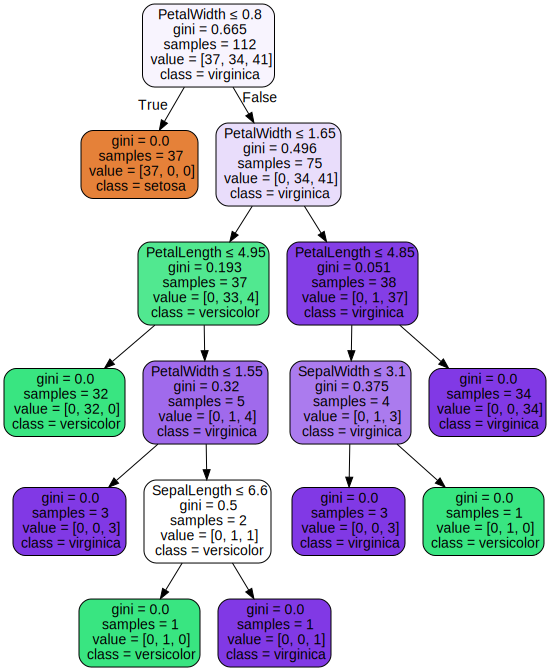

In [24]:
dot_data = tree.export_graphviz(decisionTree, out_file=None, feature_names=["SepalLength","SepalWidth","PetalLength","PetalWidth"], class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, special_characters=True)

graphviz.Source(dot_data)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F.ej=Hud7vT9uozVaF5C">dot_data</variable><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="fYtGc,k9LOv^%_9|[cfE">decisionTree</variable></variables><block type="variables_set" id=":6*zm74#9$!O3?QVUukE" x="209" y="280"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field><value name="VALUE"><block type="varDoMethod_Python" id="jsRyzb,9t~G^G@G@SMkS"><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">export_graphviz</field><data>dot_data:</data><value name="INPUT"><block type="lists_create_with" id="r2_rY*ef1v:96w)e_B6K"><mutation items="7"></mutation><value name="ADD0"><block type="variables_get" id="x$]b$%X#}qjO@0H/!O|N"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="K!=:ty3DMPs#b^ziH=5p"><field name="CODE">out_file=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="by]EM[Y$kMG~MfF0{q^,"><field name="CODE">feature_names=["SepalLength","SepalWidth","PetalLength","PetalWidth"]</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_Python" id="2hz~E.{8:W9-wWb*9Ut~"><field name="CODE">class_names=['setosa','versicolor','virginica']</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock_Python" id="^IJ3b3Eg7K9k^6Of_4i%"><field name="CODE">filled=True</field></block></value><value name="ADD5"><block type="dummyOutputCodeBlock_Python" id="VH!NxdBRgItjnN]Zs^Uh"><field name="CODE">rounded=True</field></block></value><value name="ADD6"><block type="dummyOutputCodeBlock_Python" id="f*|7fCy,K/0{_WzfribG"><field name="CODE">special_characters=True</field></block></value></block></value></block></value></block><block type="varCreateObject_Python" id="-a(nDg:Sgtf)Ey5vB4(x" x="187" y="513"><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field><field name="MEMBER">Source</field><data>graphviz:Source</data><value name="INPUT"><block type="variables_get" id="!M}@xBlLyRkl~Us)Smh%"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field></block></value></block></xml>

The learning algorithm decided that `PetalWidth` was the most important variable (or feature).
If the value of `PetalWidth` is less than .8, the iris will be classified as `setosa`.
Notice that all 37 `setosa` are classified by this one decision!
For `PetalWidth` &ge; .8 but &le 1.65 AND has `PetalLength` &le; 4.95 most iris are `versicolor` (32 of 34).
We can see some complexity here with `versicolor` that don't quite fit as nicely lower in the tree.
Everything else, more or less, is `virginica`.